In [2]:
import numpy
import matplotlib.pyplot as plt

# Parte 1: una moneda trucadas
Asumiendo que las probabilidades de sacar cara en las monedas 2, 3 y 4 son 0.5 para todas, la probabilidad de obtener las cuatro caras es:
$$P(4)=0.125 p_1$$
Para obtener la probabilidad de obtener dos caras, hay que ver la probabilidad de obtener 2 caras en las monedas no trucadas y multiplicarlas por la probabilidad de no obtener cara en la moneda 1. Luego, hay que ver la probabilidad de obtener 1 cara en las monedas no trucadas y multiplicarlas por la probabilidad de obtener cara en la moneda 1. Finalmente hay que sumar ambas probabilidades:
$$P(2)=\frac{3}{8}(1-p_1)+\frac{3}{8}p_1=\frac{3}{8}$$
# Parte 2: dos monedas trucadas
Ahora si la probabilidad de obtener cara en la moneda 2 no es 0.5 sino p2, la cosa se complica:
Para obtener la probabilidad de obtener dos caras, hay que considerar muchos más casos:
1. monedas 1 y 2: 2 caras, monedas 3 y 4: 2 sellos.
1. monedas 1 y 2: 2 sellos, monedas 3 y 4: 2 caras.
1. moneda 1: cara, moneda 2: sello, monedas 3 y 4: 1 cara.
1. moneda 1: sello, moneda 2: cara, monedas 3 y 4: 1 cara.
$$P(2)=\frac{1}{4}p_1 p_2+\frac{1}{4}(1-p_1)(1-p_2)+\frac{1}{2}p_1 (1-p_2)+\frac{1}{2}(1-p_1)p_2\\
P(2)=\frac{1+p_1+p_2-2p_1p_2}{4}$$
# parte 3: Graficar dos monedas trucadas

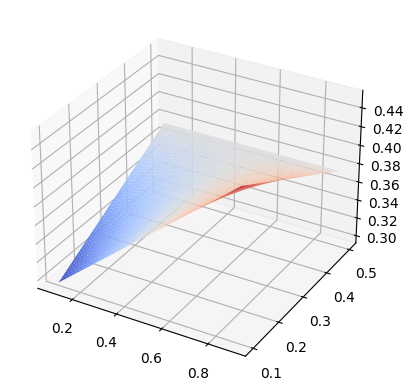

In [8]:
def func(x,y):
    return (1+x+y-(2*x*y))/4
x=numpy.linspace(0.1,0.9,100)
y=numpy.linspace(0.1,0.5,100)
X,Y=numpy.meshgrid(x,y)
Z=numpy.zeros([100,100])
for i in range(100):
    for j in range(100):
        Z[i,j]=func(X[i,j],Y[i,j])
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='coolwarm')

# Parte 4: máximos y mínimos:

In [7]:
maxi=numpy.array([0.5,0.3])
mini=numpy.array([0.5,0.3])
def f(r):
    return func(r[0],r[1])
def norma(vector):
    return numpy.sum(vector**2)**(1/2)
def derivada(f,r,h):
    return (f(r+h)-f(r-h))/(2*(norma(h)))
def gradiente(f,r,h):
    grad = numpy.zeros(r.shape)
    for i in range(len(grad)):
        delta=numpy.zeros(grad.shape)
        delta[i]=h
        grad[i]=derivada(f,r,delta)
    return grad
dist=0.0001
i=0
while dist>1e-16 and i<10000:
    i+=1
    grad=gradiente(f,mini,0.0001)
    grad=grad/norma(grad)
    mini-=dist*grad
    if mini[0]<0.1:
        mini[0]=0.1
    if mini[0]>0.9:
        mini[0]=0.9
    if mini[1]<0.1:
        mini[1]=0.1
    if mini[1]>0.5:
        mini[1]=0.5
i=0
while dist>1e-16 and i<10000:
    i+=1
    grad=gradiente(f,maxi,0.0001)
    grad=grad/norma(grad)
    maxi+=dist*grad
    if maxi[0]<0.1:
        maxi[0]=0.1
    if maxi[0]>0.9:
        maxi[0]=0.9
    if maxi[1]<0.1:
        maxi[1]=0.1
    if maxi[1]>0.5:
        maxi[1]=0.5
print("minimo:",mini)
print("maximo:",maxi)

minimo: [0.1 0.1]
maximo: [0.9 0.1]
